Импортируем все нужные для анализа библиотеки которые будут использоваться в каждом задании (более точечные библиотеки импортируются в соответствующем блоке)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm

import warnings
from IPython.display import display

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Скачиваем датасет в папку с ноутбуком

In [40]:
#!wget -O ds.csv 'https://drive.google.com/uc?export=download&id=1YE5Hlkt3pXsF3dCSmAQPrlpMqEodKFvC'
#Раскомментировать если нужно

<center><font size="8" color="turquoise">EDA (Exploratory Data Analysis)</font></center>
<div style="text-align: center;">


Проведем предварительный анализ интересующих меня вещей перед выполнением основных заданий

In [41]:
df = pd.read_csv('ds.csv')
print(df.shape)
df.head()

(336776, 14)


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


Для начала:
1) Выведем тип данных каждой фичи
2) Посчитаем кол-во пустых значений в каждой фиче
3) Посчитаем кол-во пустых строк в датасете

In [42]:
missing_values = df.isna().any()
missing_value_counts = df.isna().sum()

print('feature', '\t\t','type', '\t\t', 'missing_values', '\t', 'missing_value_counts')
for i in range(len(df.columns)):
    print(f"{df.columns[i]:<15} \t {str(df.dtypes[i]):<10} \t {str(missing_values[i]):<15} \t {missing_value_counts[i]:<10}")

empty_rows_count = df.isna().all(axis=1).sum()

print(f"Number of empty rows: {empty_rows_count}")


feature 		 type 		 missing_values 	 missing_value_counts
year            	 int64      	 False           	 0         
month           	 int64      	 False           	 0         
day             	 int64      	 False           	 0         
dep_time        	 float64    	 True            	 8255      
dep_delay       	 float64    	 True            	 8255      
arr_time        	 float64    	 True            	 8713      
arr_delay       	 float64    	 True            	 9430      
carrier         	 object     	 False           	 0         
tailnum         	 object     	 True            	 2512      
flight          	 int64      	 False           	 0         
origin          	 object     	 False           	 0         
dest            	 object     	 False           	 0         
air_time        	 float64    	 True            	 9430      
distance        	 int64      	 False           	 0         
Number of empty rows: 0


* Интересно заметить, что количество пропущенных данных о времени полета совпадает с max{'dep_time, dep_delay, arr_time, arr_delay} (то есть 9430)
* Для некоторых полетов отсутствует номер полета

Далее выведем статистику каждой фичи и посмотрим на некоторое распределение данных

In [43]:
summary_stats = df.describe(include='all')
display(summary_stats)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
count,336776.0,336776.000000,336776.000000,328521.000000,328521.000000,328063.000000,327346.000000,336776,334264,336776.000000,336776,336776,327346.000000,336776.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,4043,NaN,3,105,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UA,N725MQ,NaN,EWR,ORD,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58665,575,NaN,120835,17283,NaN,NaN
mean,2013.0,6.548510,15.710787,1349.109947,12.639070,1502.054999,6.895377,NaN,NaN,1971.923620,NaN,NaN,150.686460,1039.912604
std,0.0,3.414457,8.768607,488.281791,40.210061,533.264132,44.633292,NaN,NaN,1632.471938,NaN,NaN,93.688305,733.233033
min,2013.0,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,NaN,NaN,1.000000,NaN,NaN,20.000000,17.000000
25%,2013.0,4.000000,8.000000,907.000000,-5.000000,1104.000000,-17.000000,NaN,NaN,553.000000,NaN,NaN,82.000000,502.000000
50%,2013.0,7.000000,16.000000,1401.000000,-2.000000,1535.000000,-5.000000,NaN,NaN,1496.000000,NaN,NaN,129.000000,872.000000
75%,2013.0,10.000000,23.000000,1744.000000,11.000000,1940.000000,14.000000,NaN,NaN,3465.000000,NaN,NaN,192.000000,1389.000000


Посмотрим распределение по месяцам и дням

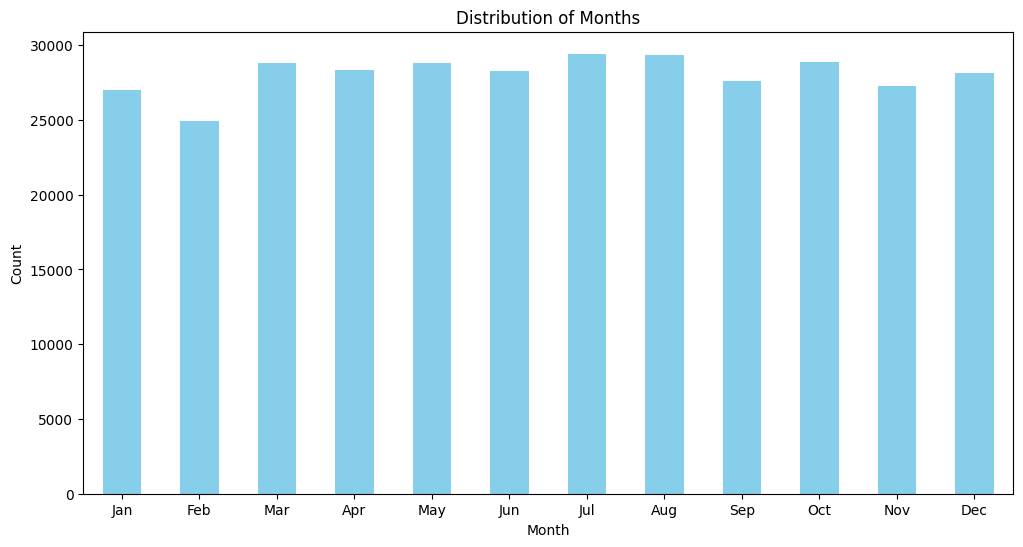

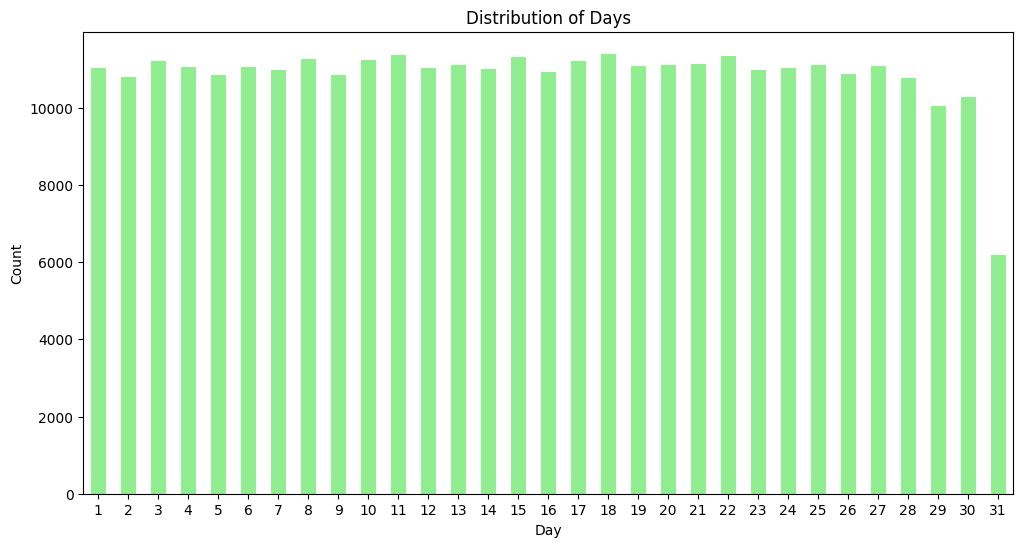

In [44]:
plt.figure(figsize=(12, 6))
df['month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 6))
df['day'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Days')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

По этим распределениям можно видеть что все полеты совершаются равномерно каждый день (31-ый день месяца каждый второй месяц, поэтому тут половина от остальных дней). В целом соответствует ожиданиям

В целом самую основу адекватности данных мы провели, более точечный анализ думаю будет выполнен непосредственно в самих заданиях

In [45]:
df = df.dropna()
df.shape

(327346, 14)

<center><font size="6" color="turquoise">Задание № 1</font></center>
<div style="text-align: center;">


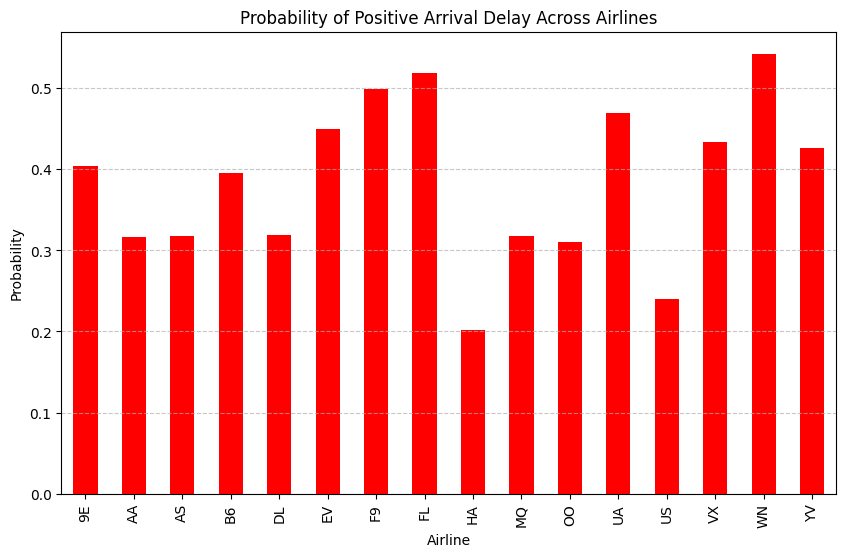

In [46]:
# Определяем вероятности положительных задержек для каждой авиакомпании
positive_delay_prob = df.groupby('carrier')['dep_delay'].apply(lambda x: (x > 0).mean())

plt.figure(figsize=(10, 6))
positive_delay_prob.plot(kind='bar', color='red') 

plt.title('Probability of Positive Arrival Delay Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Probability')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<center><font size="6" color="turquoise">Задание № 2</font></center>
<div style="text-align: center;">


Я бы разделил полеты на категории по следующим расстояниям (изначально посмотрел на распределение, затем выбрать границы перелетов)
* Короткие [0:1500]
* Средние [1500:3000]
* Длинные  [3000:5000]

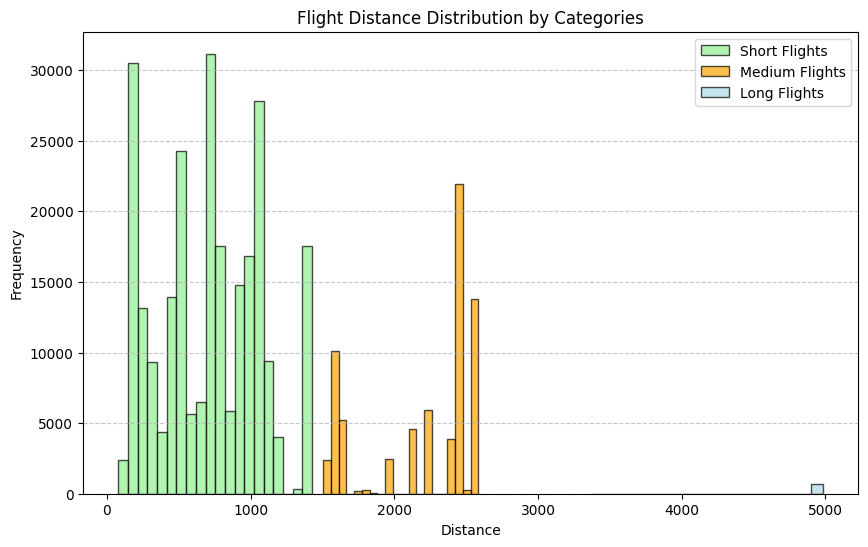

In [47]:
short_boundary = 1500
medium_boundary = 3000
long_boundary = 5000

short_flights = df[df['distance'] <= short_boundary]
medium_flights = df[(df['distance'] > short_boundary) & (df['distance'] <= medium_boundary)]
long_flights = df[(df['distance'] > medium_boundary) & (df['distance'] <= long_boundary)]

plt.figure(figsize=(10, 6))

plt.hist(short_flights['distance'], bins=20, color='lightgreen', label='Short Flights', edgecolor='black', alpha=0.7)

plt.hist(medium_flights['distance'], bins=20, color='orange', label='Medium Flights', edgecolor='black', alpha=0.7)

plt.hist(long_flights['distance'], bins=20, color='lightblue', label='Long Flights', edgecolor='black', alpha=0.7)

plt.title('Flight Distance Distribution by Categories')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Узнаем в какие аэропорты летят самолеты дальними перелетами

In [48]:
long_flights_destinations = long_flights['dest'].unique()

print("Destinations of long flights:", long_flights_destinations)


Destinations of long flights: ['HNL' 'ANC']


"Найдите среднее время задержки вылета в каждой из трех выделенных групп". 

Будем находить среднее с учетом запозданий и ранних прилетов

In [49]:
average_delay_short = short_flights['dep_delay'].mean()
average_delay_medium = medium_flights['dep_delay'].mean()
average_delay_long = long_flights['dep_delay'].mean()

print("Average Departure Delay for Short Flights:", average_delay_short)
print("Average Departure Delay for Medium Flights:", average_delay_medium)
print("Average Departure Delay for Long Flights:", average_delay_long)

Average Departure Delay for Short Flights: 12.929700225535647
Average Departure Delay for Medium Flights: 11.244368025826374
Average Departure Delay for Long Flights: 9.355430183356841


<center><font size="6" color="turquoise">Задание № 3</font></center>
<div style="text-align: center;">


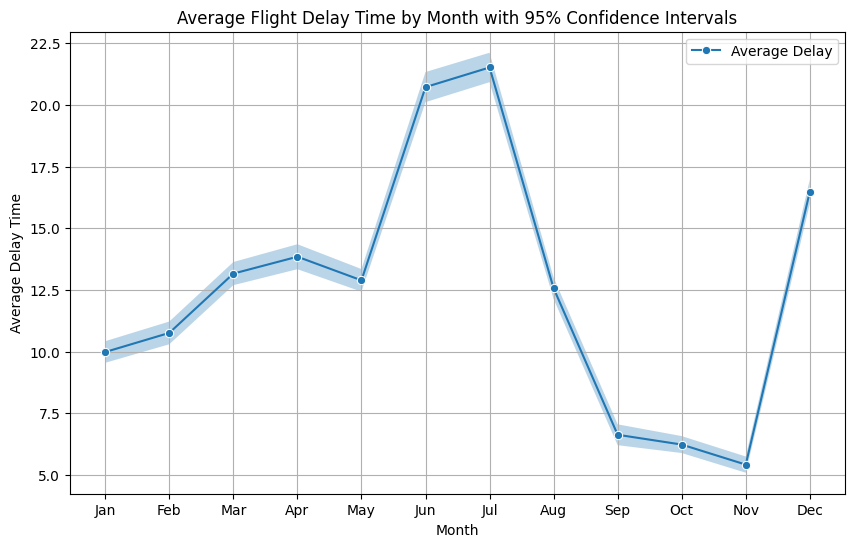

In [50]:
average_delay_by_month = df.groupby('month')['dep_delay'].mean()
confidence_intervals = df.groupby('month')['dep_delay'].agg(lambda x: stats.sem(x) * stats.t.ppf((1 + 0.95) / 2, len(x) - 1))

plt.figure(figsize=(10, 6))
sns.lineplot(x=average_delay_by_month.index, y=average_delay_by_month.values, marker='o', label='Average Delay')
plt.fill_between(average_delay_by_month.index, average_delay_by_month - confidence_intervals, average_delay_by_month + confidence_intervals, alpha=0.3)

plt.xlabel('Month')
plt.ylabel('Average Delay Time')
plt.title('Average Flight Delay Time by Month with 95% Confidence Intervals')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()

plt.show()


Попробуем использовать t-test для проверки равенства средних задержек вылета в январе и в феврале

In [51]:
january_delay = df[df['month'] == 1]['dep_delay']
february_delay = df[df['month'] == 2]['dep_delay']

In [52]:
t_statistic, p_value = stats.ttest_ind(january_delay, february_delay)

In [53]:
levels = [0.05, 0.01]
for alpha in levels:
    print(f"Significance level: {alpha}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < alpha:
        print("Reject null hypothesis")
    else:
        print("Accept null hypothesis")
    print()

Significance level: 0.05
T-statistic: -2.386498623322741
P-value: 0.017013366495100535
Reject null hypothesis

Significance level: 0.01
T-statistic: -2.386498623322741
P-value: 0.017013366495100535
Accept null hypothesis



t-test при уровне значимости 0.01 НЕ отвергает гипотезу о равенстве двух средних

<center><font size="6" color="turquoise">Задание № 4</font></center>
<div style="text-align: center;">


In [54]:
from scipy.stats import linregress

Correlation coefficient: 0.990649647224859

Linear Regression Coefficients:
Slope: 0.12611932467386083
Intercept: 18.466578127760187


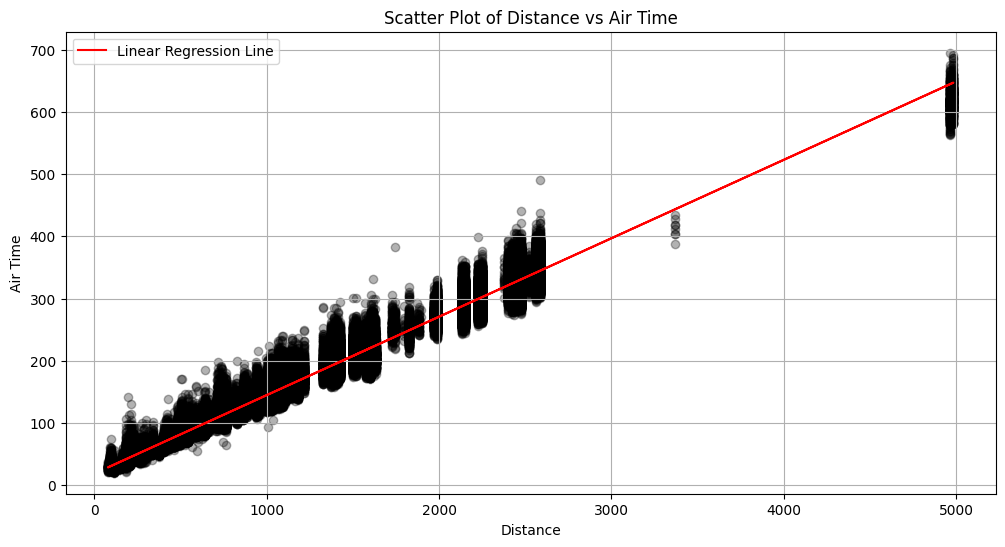

In [55]:
# 1. Расчет коэффициента корреляции 
correlation_coefficient = np.corrcoef(df['distance'], df['air_time'])[0, 1]
print("Correlation coefficient:", correlation_coefficient, end='\n\n')

# 2. Точечная диаграмма расстояния полета от времени полета
plt.figure(figsize=(12, 6))
plt.scatter(df['distance'], df['air_time'], color='black', alpha=0.3)

plt.xlabel('Distance')
plt.ylabel('Air Time')
plt.title('Scatter Plot of Distance vs Air Time')

# 3. Коэффициенты линейной регрессии
slope, intercept, _, _, _ = linregress(df['distance'], df['air_time']) # Отбрасываем ненужные параметры с помощью _

print("Linear Regression Coefficients:")
print("Slope:", slope)
print("Intercept:", intercept)

# 4. kx+b (LR)
plt.plot(df['distance'], slope * df['distance'] + intercept, color='red', label='Linear Regression Line')
plt.legend()

plt.grid(True)
plt.show()

Как можно интерпретировать коэффициенты LR...
* slope: на на каждую дополнительную единицу расстояния, время полета увеличивается в среднем на 0.1261 минуты.
* intercept: в целом адекватно дать смысл этому параметру нельзя. По определению это время, когда самолет прошел с начала полета эпсилон единиц расстояния. По факту этот параметр должен быть равен 0. Но ввиду неравномерности полетов, разных моделей самолетов, опытности пилотов этот параметр отличен от нуля.

<center><font size="6" color="turquoise">Задание № 5</font></center>
<div style="text-align: center;">


По гистограмме очевидно что это нормальное распределение с довольно хорошими параметрами

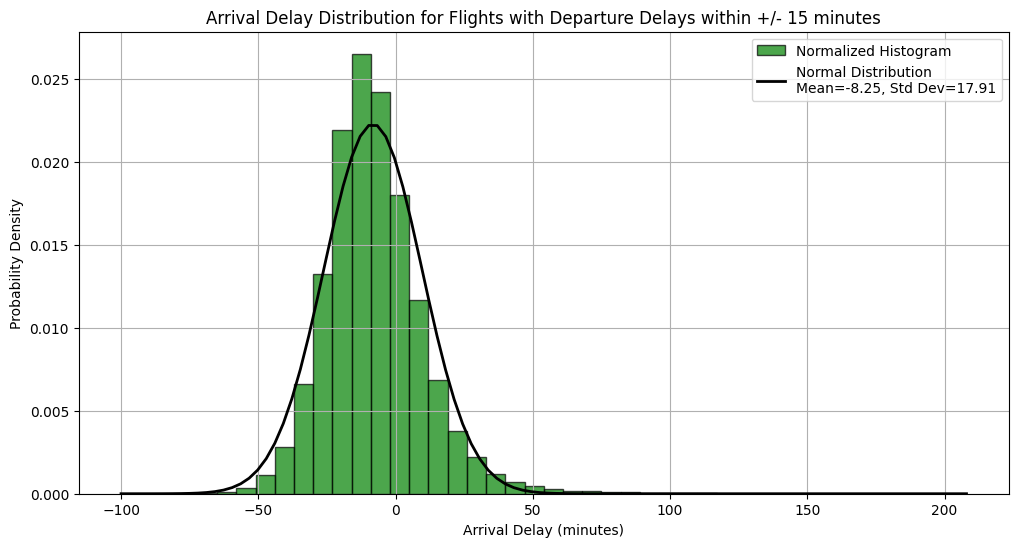

In [56]:
# Отберем такие строки, у которых время задержки вылета в интервале от -15 до 15
filtered_data = df[(df['dep_delay'] >= -15) & (df['dep_delay'] <= 15)]

# Получим параметры нашего распределения, апроксимируя его нормальным
arr_delay = filtered_data['arr_delay']
mean, std_dev = norm.fit(arr_delay)


plt.figure(figsize=(12, 6))
plt.hist(arr_delay, bins=40, density=True, color='green', edgecolor='black', alpha=0.7, label='Normalized Histogram')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)

plt.plot(x, p, 'k', linewidth=2, label=f'Normal Distribution\nMean={mean:.2f}, Std Dev={std_dev:.2f}')

plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Probability Density')
plt.title('Arrival Delay Distribution for Flights with Departure Delays within +/- 15 minutes')
plt.legend()
plt.grid(True)
plt.show()

Попробуем проверить нормальность распределения с помощью некоторых критериев, например Андерсона-Дарлинга или Колмогорова-Смирнова

![Normality Criteria](Normality_criteria.png)


In [57]:
from scipy.stats import anderson
from scipy.stats import kstest

ad_result = anderson(arr_delay)
kstest_result = kstest(arr_delay, 'norm')

print("Anderson-Darling test statistic:", ad_result.statistic)
print("Kolmogorov-Smirnov test statistic:", kstest_result.statistic)
print('')
print("Critical values:", ad_result.critical_values)
print("p-value:", kstest_result.pvalue)

alpha = 0.05

if ad_result.statistic < ad_result.critical_values[2]:
    print("Accept the null hypothesis for Anderson-Darling test")
else:
    print("Reject the null hypothesis for Anderson-Darling test")

if kstest_result.pvalue > alpha:
    print("Accept the null hypothesis for Kolmogorov-Smirnov test")
else:
    print("Reject the null hypothesis for Kolmogorov-Smirnov test")


Anderson-Darling test statistic: 1684.745487745182
Kolmogorov-Smirnov test statistic: 0.677518258845786

Critical values: [0.576 0.656 0.787 0.918 1.092]
p-value: 0.0
Reject the null hypothesis for Anderson-Darling test
Reject the null hypothesis for Kolmogorov-Smirnov test


Оба критерия отвергли гипотезу о нормальности распределения. Видимо, ввиду большого размера выборки, даже небольшое визуальное расхождение значений данных от нормального распределения может сильно влиять на его распределение. 

T-Статистики показывают что данные ВООБЩЕ не принадлежат нормальному распределению (0%). [Возможно я где-то ошибся, но я не нашел ошибку :)]


<center><font size="6" color="turquoise">Задание № 6</font></center>
<div style="text-align: center;">


Обучим базовую логистическую регрессию без сильных ухищрений

Фичи
* Год - не имеет смысла здесь. (можно удалить из датасета для экономии памяти)
* Месяц, день - можно создать новые фичи по этим дням: день недели. Думаю в воскресенье/субботу опаздываний больше. 
* Время отправки и опоздание отправки - окей, берем (не переводим в другой формат, используем HHMM/HMM).
* Время прилета - ок, берем (не переводим в другой формат, используем HHMM/HMM).
* Авиакомпания - 100% берем .
* Номер рейса и номер хвоста самолета - НЕ БЕРЕМ, мы используем статистику а не всякие магические приколы связанные с цифрами.
* Аэропорты - берем, возможно на какой-то аэропорт тяжело приземлиться и там будут какие-то опоздания
* Время полета и дистанция - берем одну фичу ибо у них корреляция 99% (задание 4). 

На самом деле сначала нужно посмотреть корреляции фичей, попробовать обучить на всех фичах, взять самые важные фичи, взять комбинации фичей/функции фичей(логарифмы, линейную комбинацию...), попробовать перевести время в другой формат... Но мы этого делать не будем, попробуем обучить на базовых фичах

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Создаем матрицу фичей и вектор таргетов
X = df[['dep_time', 'dep_delay', 'arr_time', 'carrier', 'origin', 'dest', 'distance']]
y = (df['arr_delay'] > 15).astype(int)

# Делает категориальные фичи - создаем false true доп фичи
X = pd.get_dummies(X, columns=['carrier', 'origin', 'dest'])

# Сплитим данные на тест и трейн
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=616)

# Создаем класс LogReg
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Записываем предикты
y_pred = model.predict(X_test)

# Оцениваем метрики нашей модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9020925614785398
Precision: 0.883823779554346
Recall: 0.6732314071002851


Сойдет наверное

Я проанализировал неправильные предикты 

```misclassified_indices = y_test != y_pred```

```misclassified_X = X_test[misclassified_indices]```

Однако никаких закономерностей я не обнаружил между фичами, поэтому анализ неверных предсказанных случаев я опущу.

На каких случаях модель ошибается? 
* На разных

Как можно улучшить модель? 
* Использовать другую модель
* Сделать более умный анализ фичей, нежели это сделал я (корреляция, SHAP, PCA)
* Гиперпараметры